# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [3]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Challenge 1

#### The data we will use in this challenge is:

In [5]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

Text(0, 0.5, 'y')

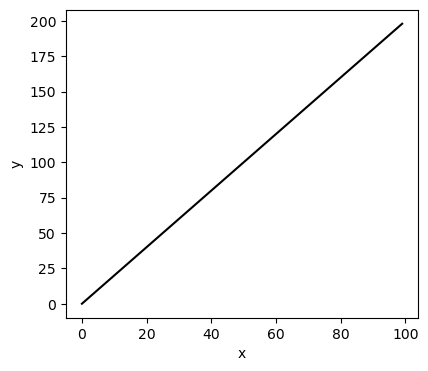

In [16]:
# Method 1
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, y, 'black')
plt.xlabel('x')
plt.ylabel('y')

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

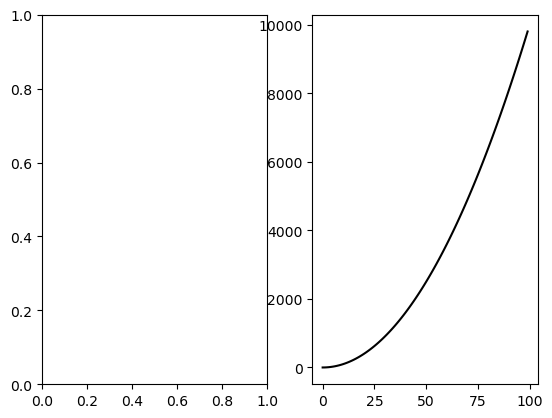

In [14]:
# Method 2
plt.subplots(nrows=1, ncols=2)
plt.plot(x, z, 'black')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0, 0.5, 'y')

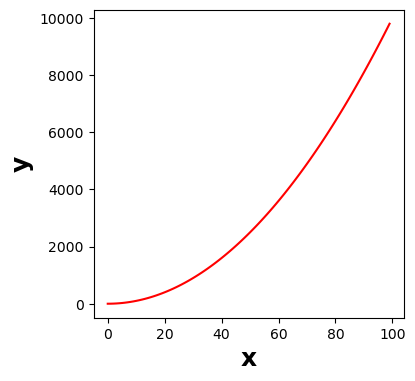

In [30]:
# your code here
plt.figure(figsize=(4, 4))
plt.subplot(1, 1, 1)
plt.plot(x, z, 'red')
plt.xlabel('x', fontsize=18, fontweight='bold')
plt.ylabel('y', fontsize=18, fontweight='bold')

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.


In [45]:
# your code here
x = np.arange(0, 1000)
y1 = x**2
y2 = np.exp(x)

C:\Users\geert\AppData\Local\Temp\ipykernel_8500\748316403.py:4: RuntimeWarning: overflow encountered in exp
  y2 = np.exp(x)


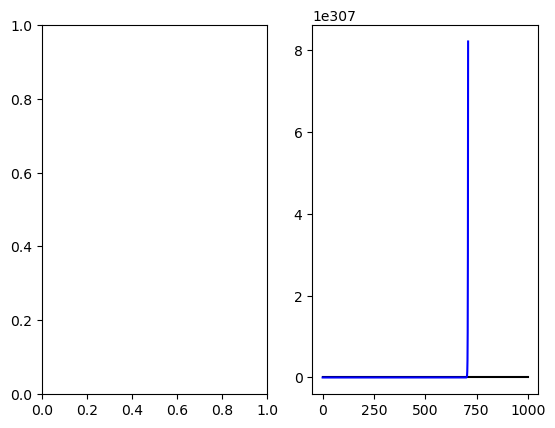

In [46]:
plt.subplots(1, 2)
plt.plot(x, y1, 'black')
plt.plot(x, y2, 'blue')



#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [4]:
# your code here
fitbit = pd.read_csv('Fitbit2.csv')

In [5]:

fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

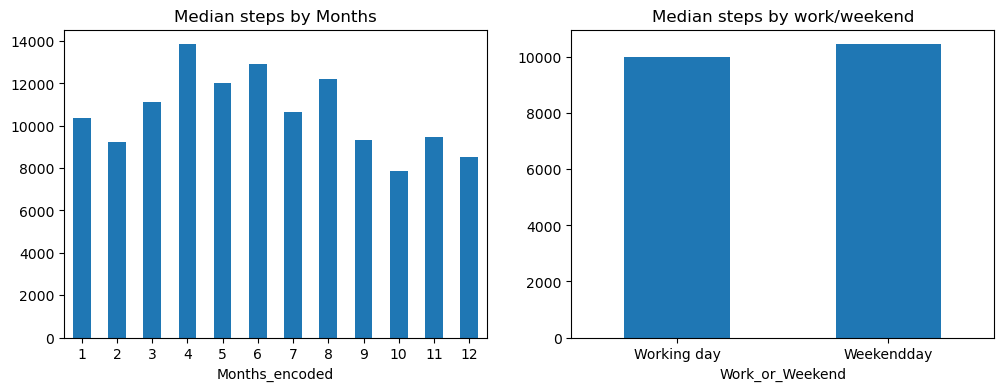

In [34]:
# MEDIAN STEPS BY MONTH_ENCODED
monthly_steps = fitbit.groupby("Months_encoded")["Steps"].median()

# MEDIAN STEPS BY WORK_OR_WEEKEND
work_weekend = fitbit.groupby("Work_or_Weekend")["Steps"].median()

# your code here
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#code for plot 1
plt.sca(axes[0])
monthly_steps.plot(kind="bar")
plt.title("Median steps by Months")
plt.xticks(rotation=0)

#code for plot 2
plt.sca(axes[1])
work_weekend.plot(kind="bar")
plt.title("Median steps by work/weekend")
plt.xticks([0, 1], ["Working day", "Weekendday"], rotation=0)

#save the figures
plt.savefig("figures/fitbit.png")



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

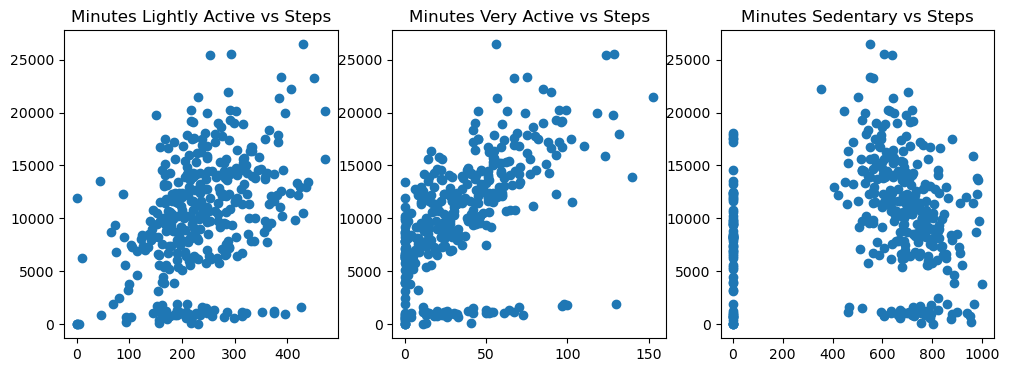

In [35]:
# your code here

#first we make the pairs so the loop knows what to do, im not sure if theres another way to do it? 

pairs = [("Minutes Lightly Active", "Steps"), ("Minutes Very Active", "Steps"), ("Minutes Sedentary", "Steps")]

#lets create a subplot space for the 3 graphs

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

#here comes the loop, theres probably a cleaner way to do it with comprehension and such, i tried to google/stackoverflow but cant really make it work


for i, (x, y) in enumerate(pairs):
    plt.sca(axes[i])
    plt.scatter(fitbit[x], fitbit[y])
    plt.title(f"{x} vs {y}")


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [37]:
# your code here
titanic = pd.read_csv("titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

In [39]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [44]:
# NUMERICAL VARIABLES
numericals = titanic.select_dtypes(include=[float, int])
# your code here
print(numericals)

      PassengerId  Survived  Pclass        Age  SibSp  Parch      Fare
0               1       0.0       3  22.000000      1      0    7.2500
1               2       1.0       1  38.000000      1      0   71.2833
2               3       1.0       3  26.000000      0      0    7.9250
3               4       1.0       1  35.000000      1      0   53.1000
4               5       0.0       3  35.000000      0      0    8.0500
...           ...       ...     ...        ...    ...    ...       ...
1304         1305       NaN       3  29.513190      0      0    8.0500
1305         1306       NaN       1  39.000000      0      0  108.9000
1306         1307       NaN       3  38.500000      0      0    7.2500
1307         1308       NaN       3  29.513190      0      0    8.0500
1308         1309       NaN       3  25.315435      1      1   22.3583

[1309 rows x 7 columns]


In [46]:
# CATEGORICAL VARIABLES
categoricals = titanic.select_dtypes(include=["object"])
# your code here
print(categoricals)

                                                   Name  Gender  \
0                               Braund, Mr. Owen Harris    male   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                                Heikkinen, Miss. Laina  female   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                              Allen, Mr. William Henry    male   
...                                                 ...     ...   
1304                                 Spector, Mr. Woolf    male   
1305                       Oliva y Ocana, Dona. Fermina  female   
1306                       Saether, Mr. Simon Sivertsen    male   
1307                                Ware, Mr. Frederick    male   
1308                           Peter, Master. Michael J    male   

                  Ticket Cabin Embarked  
0              A/5 21171    U0        S  
1               PC 17599   C85        C  
2       STON/O2. 3101282    U0        S  
3                 113803  C

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [49]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12, 6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

Text(0.5, 1.0, 'Age distribution')

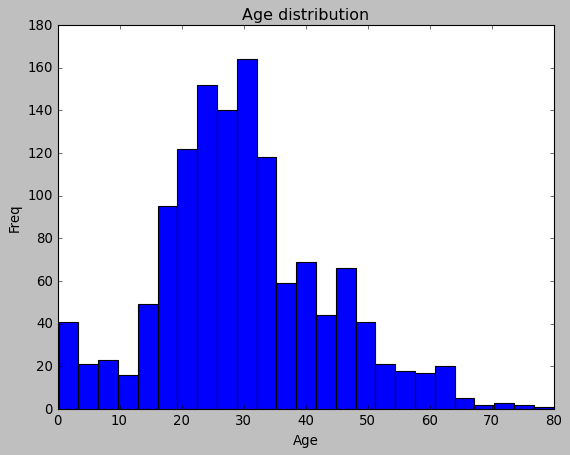

In [51]:
plt.hist(titanic['Age'], bins=25)
plt.xlabel('Age')
plt.ylabel('Freq')
plt.title('Age distribution')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

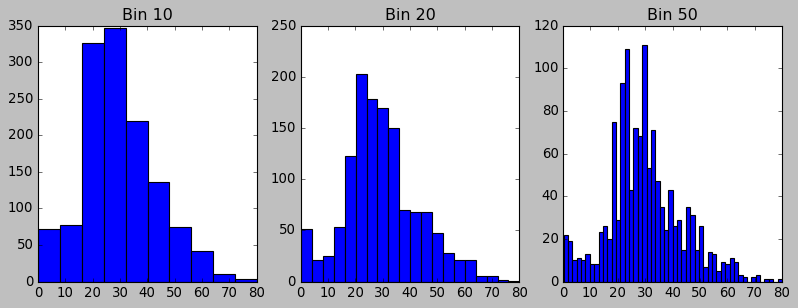

In [60]:
# your code here
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

#code for bin 10
plt.sca(axes[0])
plt.hist(titanic['Age'], bins=10)
plt.title("Bin 10")
#code for bin 20
plt.sca(axes[1])
plt.hist(titanic['Age'], bins=20)
plt.title("Bin 20")
#code for bin 50
plt.sca(axes[2])
plt.hist(titanic['Age'], bins=50)
plt.title("Bin 50")
plt.show()


#### How does the bin size affect your plot?

In [61]:
"""
The reader is able to see more details and about the distribution of age the more bins there are, but it becomes less readable aswell
the 20 bin one is the sweet spot. 
"""

'\nThe reader is able to see more details and about the distribution of age the more bins there are, but it becomes less readable aswell\n'

#### Use seaborn to show the distribution of column `Age`.

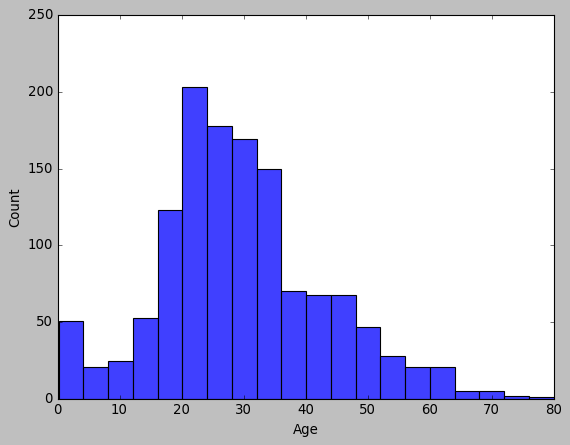

In [64]:
# your code here
sns.histplot(titanic['Age'], bins=20)
plt.show()


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

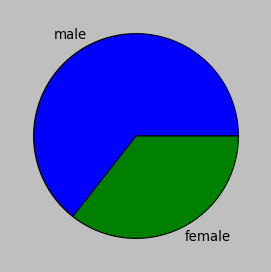

In [72]:
# Method 1 - matplotlib
# lets use my favorite pie chart ;) ;)

gender_total = titanic['Gender'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(gender_total, labels=gender_total.index)
plt.show()

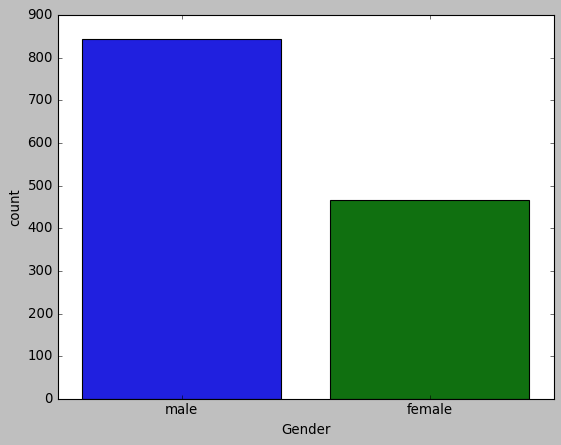

In [79]:
# Method 2 - seaborn
sns.countplot(data=titanic, x='Gender')
plt.show()
# your code here

#### Use the right plot to visualize the column `Pclass`.

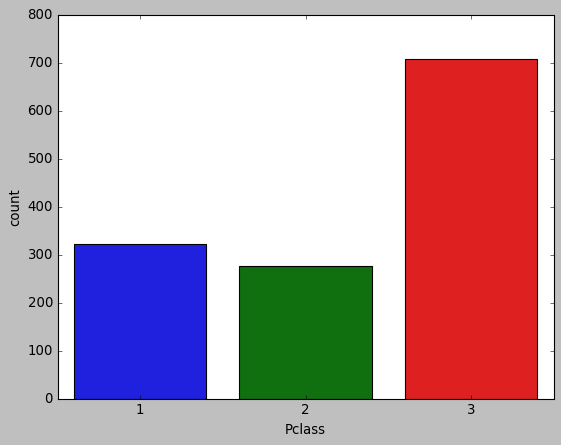

In [80]:
# your code here
sns.countplot(data=titanic, x='Pclass')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

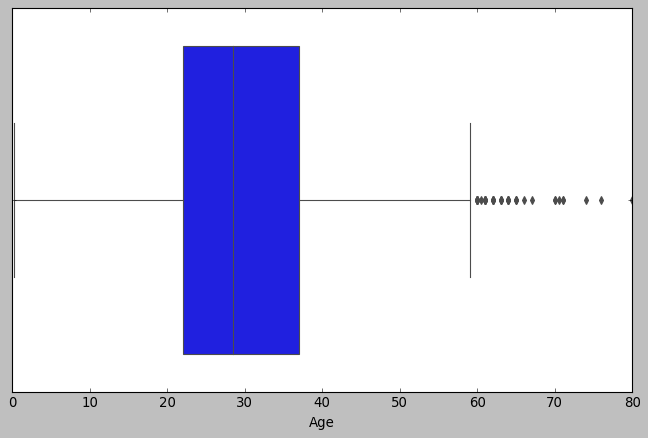

In [87]:
# your code here
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic, x='Age')
plt.show()

In [88]:
import plotly.express as px

fig = px.box(titanic, x='Age')
fig.show()

In [ ]:
"""
thats why we use plotly, way betterrrr!! 
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
I would say its a generally young list of passengers on the titanic, although i need to compare them to
statistics of the population of the countries of origin of the passengers. it was early 1900's afterall and
people tend to die at a younger age then they do nowadays. life expentacy in 1900's unknown by me.

"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [91]:
# your code here
#Google tells me to use the v*g*na plot.

px.violin(titanic, x='Age')

#there we go i guess... :P 

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Its like a histogram displayed over a boxplot. 
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

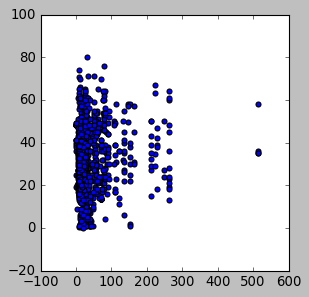

In [93]:
# Method 1 - matplotlib
# we make scatterplot for this
plt.figure(figsize=(4,4))
plt.scatter(titanic['Fare'], titanic['Age'])
plt.show()



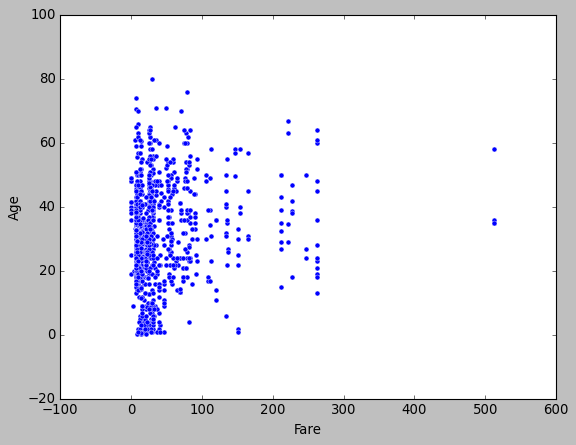

In [95]:
# Method 2 - seaborn
# your code here
sns.scatterplot(titanic, x='Fare', y='Age')
plt.show()

#### Plot the correlation matrix using seaborn.

<Axes: >

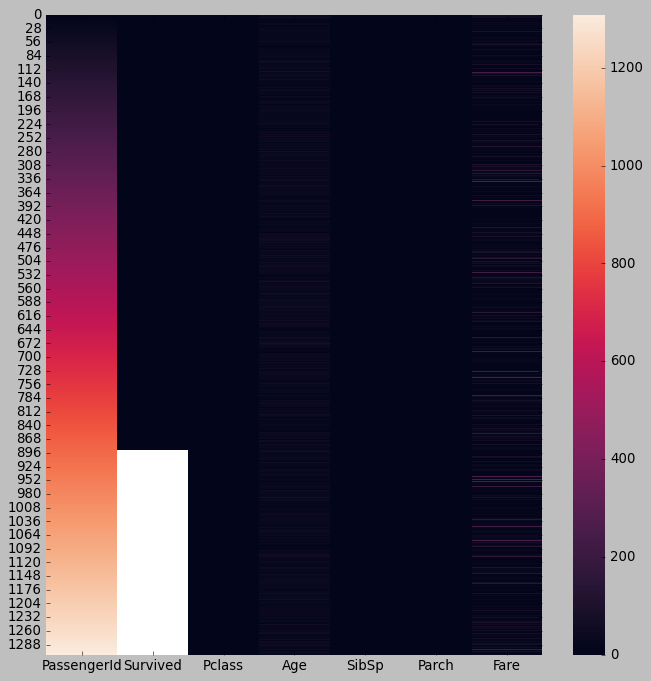

In [104]:
# your code here
plt.figure(figsize=(10,10))
sns.heatmap(numericals)

#### What are the most correlated features?

In [ ]:
"""
This one is not good
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

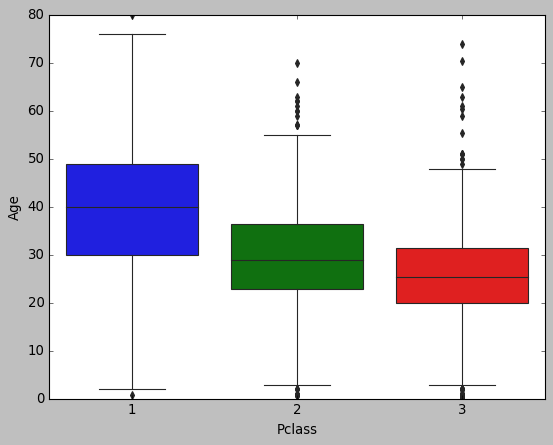

In [113]:
# your code here
sns.boxplot(titanic, x='Pclass', y='Age')
plt.show()

#not ideal but if i switch the x and y axis then it will plot based on all the ages, so maybe make age groups and then 
#do that but feels like its snot the way to go


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

<Axes: xlabel='Age', ylabel='Gender'>

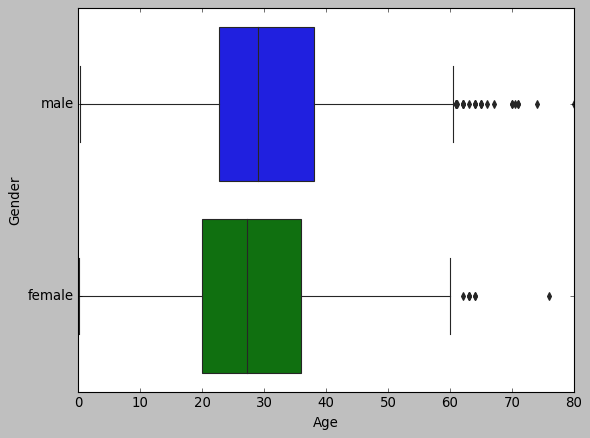

In [114]:
# your code here
sns.boxplot(titanic, x='Age', y='Gender')

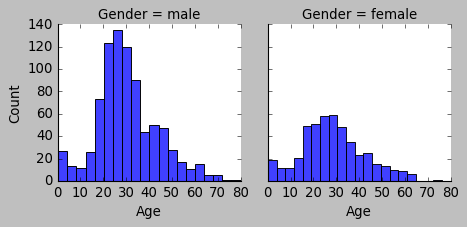

In [120]:
test = sns.FacetGrid(titanic, col='Gender')
test.map(sns.histplot, 'Age', bins=20)
plt.show()

In [ ]:
#yay it worked